In [43]:
import cmeutils
import cmeutils.polymers as polymer
from cmeutils.gsd_utils import snap_molecule_cluster
import warnings
warnings.filterwarnings("ignore")
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

## Example

This example is for a .gsd file that contains 10 molecuels, each one with 5 monomers
The molecules are united-atom PEEK, so each monomer contains 22 atoms

In [2]:
gsdfile = "/home/chris/scratch-pad/single-500mer.gsd"
peek_system = polymer.System(gsd_file=gsdfile, atoms_per_monomer=22)

0.06330585479736328


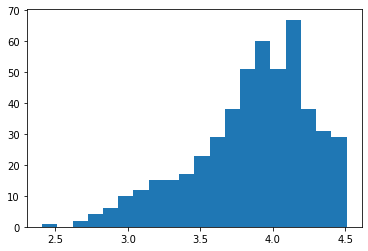

In [47]:
start = time.time()
bond_dist = peek_system.bond_length_distribution(nbins=20, plot=True)
finish=time.time()
print(finish - start)

0.06716728210449219


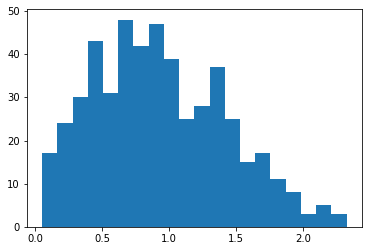

In [20]:
start = time.time()
ang_dist = peek_system.bond_angle_distribution(nbins=20, plot=True)
finish=time.time()
print(finish - start)

In [57]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))

def plot_distribution(x):
    bin_heights, bin_borders = np.histogram(x, bins='auto')
    bin_widths = np.diff(bin_borders)
    bin_centers = bin_borders[:-1] + bin_widths / 2
    popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

    x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)

    plt.bar(bin_centers, bin_heights, width=bin_widths, label='histogram')
    plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit', c='red')
    plt.legend()
    return x_interval_for_fit, gaussian(x_interval_for_fit, *popt)

def boltzmann_inverse(data, T):
    return -np.log(data)

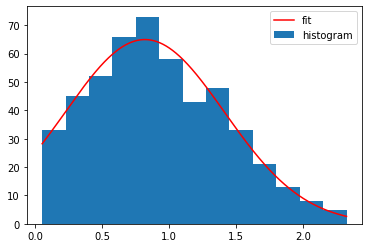

In [61]:
ang, ang_prob = plot_distribution(ang_dist)

In [65]:
ang_pot = boltzmann_inverse(np.vstack((ang, ang_prob)), T=1)

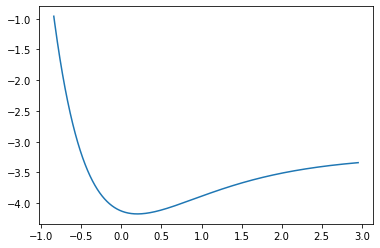

In [71]:
plt.plot(ang_pot[0,:], ang_pot[1,:])

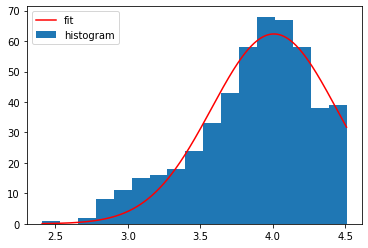

In [50]:
plot_distribution(bond_dist)

In [ ]:
v_angle = 

In [ ]:
for mol in peek_system.molecules:
    mol.generate_segments(10)

In [ ]:
peek_system.molecules[0].segments

In [ ]:
for i in peek_system.molecules[0].bond_vectors():
    print(i)

In [ ]:
mol_1.end_to_end_distance()

In [ ]:
for mon in mol_1.monomers:
    print(mon.center_of_mass)

## Coarse-graining

We can use the center of mass methods and Molecule and Monomer classes to generate a coarse-grained representation of the UA system:

**NOTE:**
This requires that mbuild and py3Dmol are installed

`conda install -c conda-forge mbuild py3Dmol`

In [ ]:
import mbuild as mb

## Example: Using the Monomer() class to create a coarse-grained system

Using mBuild, and the tools described above, we can generate a coarse-grained representation of the system where 1 bead is equivalent to 1 monomer from the united-atom system.

In [ ]:
cg_system = mb.Compound()
for mol_idx, molecule in enumerate(peek_system.molecules):
    molecule_comp = mb.Compound(name=f"mol{mol_idx}")
    last_bead = None
    for mon_idx, monomer in enumerate(molecule.monomers):
        bead_name = f"mol{mol_idx}_mon{mon_idx}"
        #pos = monomer.unwrapped_center * 3.3996695084235347
        pos = monomer.center / 10
        bead = mb.Compound(name=bead_name, pos=pos)
        molecule_comp.add(bead)
        if 0 < mon_idx < len(molecule.monomers):
            molecule_comp.add_bond((bead, last_bead))
        last_bead = bead
    cg_system.add(molecule_comp)
    
cg_system.visualize()

## Example: Using the Segment() class to create a coarse-grained system:

In the cells above, we generated segments where 1 molecule 

In [ ]:
cg_seg_system = mb.Compound()
for mol_idx, molecule in enumerate(peek_system.molecules):
    molecule_comp = mb.Compound(name=f"mol{mol_idx}")
    last_bead = None
    for seg_idx, segment in enumerate(molecule.segments):
        bead_name = f"mol{mol_idx}_mon{seg_idx}"
        #pos = monomer.unwrapped_center * 3.3996695084235347
        pos = segment.center / 10
        bead = mb.Compound(name=bead_name, pos=pos)
        molecule_comp.add(bead)
        if 0 < seg_idx < len(molecule.monomers):
            molecule_comp.add_bond((bead, last_bead))
        last_bead = bead
    cg_seg_system.add(molecule_comp)
    
cg_seg_system.visualize()

In [ ]:
ua_mol = mb.load("/home/chris/single_20mer_cpk.mol2")

In [ ]:
compare = mb.Compound(subcompounds = [ua_mol, cg_system, cg_seg_system])

In [ ]:
compare.save("compare_2.mol2")